<a href="https://colab.research.google.com/github/ChrisO27/First-Repository/blob/main/PRESENTACI%C3%93N_FINAL_LATAM_ANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Análisis de empresa de Coca Cola


The Coca-Cola Company es una corporación multinacional estadounidense de bebidas con sede en Atlanta, Georgia. The Coca-Cola Company tiene intereses en la fabricación, venta minorista y comercialización de concentrados y jarabes para bebidas no alcohólicas.

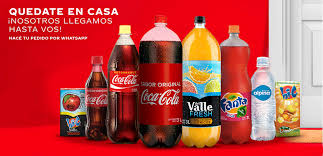

## ***Descripción de la empresa***

---



***MISIÓN***

Refrescar al mundo e inspirar momentos de optimismo y felicidad a través de una amplia oferta de bebidas de calidad.

***VISIÓN***

seguir siendo líder en el rubro de bebidas, que genere valor económico, social y ambiental sostenible.

***VALORES***

*   Liderazgo: Moldear un futuro mejor
*   Integridad: Ser real
*   Calidad: Ofrecer productos bien elaborados. “Lo que hacemos, lo hacemos bien”
*   Diversidad: Ser una marca inclusiva
*   Responsabilidad: “Si ha de ser, depende de mi”
*   Colaboración
*   Pasión: Comprometidos en corazón y mente 








## ***ANÁLISIS PESTEL***

---



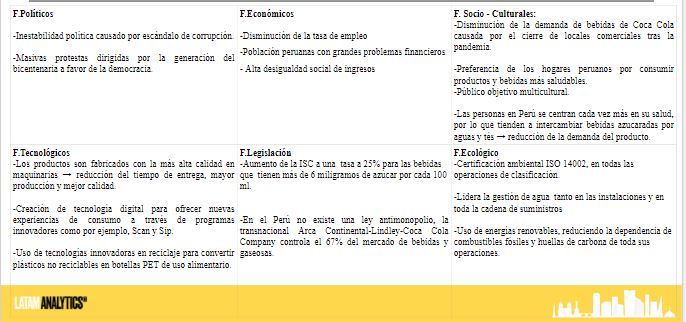

## ***5 FUERZAS DE PORTER***




---


---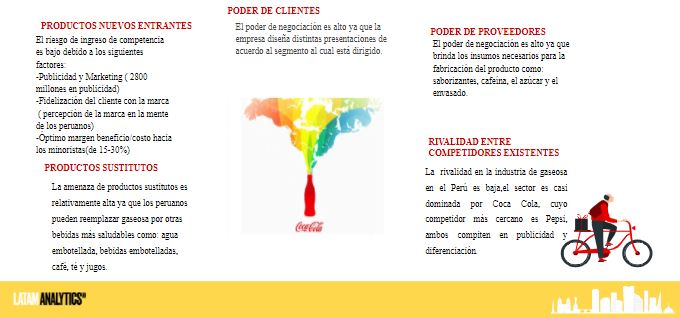




## CONEXION AL DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## PRESENTACIÓN DEL DATASET

In [7]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importamos el dataset
dataset = pd.read_csv('/content/drive/MyDrive/GRUPO 1 - LATAM ANALYTICS/COCACOLA_DATASET.csv',sep= ";")

# Mostramos el dataset
display(dataset)

,Anio,Pasivo_Total,Patrimonio_neto,Ventas,Utilidad_neta,Cuentas_por_cobrar,Activo_corriente,Pasivo_corriente,Inventarios
0,2013,1892012,1820717,4003734,942643,387731,782378,1152365,223260
1,2014,1926436,1857979,4173505,943908,336574,709413,1180020,197235
2,2015,2148906,1927035,4483993,1188827,379189,926893,1382907,189972
3,2016,2042556,1797334,4634129,755992,301287,952440,1592220,154201
4,2017,3567517,1962997,5022009,1390281,876936,2197450,3144813,183577
5,2018,4269078,2249130,5343674,1840790,1516207,2132139,3611216,198098
6,2019,4648257,2130962,5709588,2011471,2086652,2673838,3982487,223119


### KPI 1 - ENDEUDAMIENTO PATRIMONIAL
---
#### OBJETIVO
*   Incrementar el grado de solvencia

#### META
*   Endeudamiento patrimonial menor 1

#### KPI
$Endeudamiento\ patrimonial = \frac{Pasivo\ Total}{Patrimonio\ Neto}$

In [8]:
# Calculo del endeudamiento patrimonial
dataset['Endeudamiento_patrimonial'] = dataset['Pasivo_Total']/dataset['Patrimonio_neto']
# Mostramos el endeudamiento
display(dataset.iloc[:,[0,1,2,-1]].round(2))

,Anio,Pasivo_Total,Patrimonio_neto,Endeudamiento_patrimonial
0,2013,1892012,1820717,1.04
1,2014,1926436,1857979,1.04
2,2015,2148906,1927035,1.12
3,2016,2042556,1797334,1.14
4,2017,3567517,1962997,1.82
5,2018,4269078,2249130,1.90
6,2019,4648257,2130962,2.18


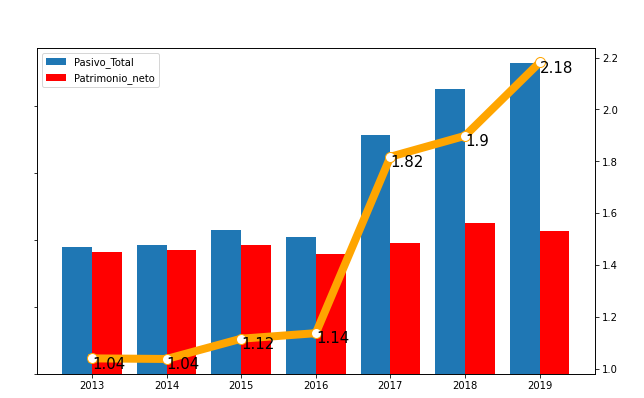

In [6]:
# Grafico
fig, ax = plt.subplots()

# Creamos un grafico de barras del Pasivo Total
ax.bar(dataset['Anio']-0.2,dataset['Pasivo_Total'],width=0.4)
# Creamos un gráfico de barras del Patrimonio Neto
ax.bar(dataset['Anio']+0.2,dataset['Patrimonio_neto'],color = 'Red',width=0.4)
# Customizaciones
ax.legend(labels=['Pasivo_Total', 'Patrimonio_neto'])
ax.set_title('Ratio de Endeudamiento Patrimonial CocaCola-Company\n2013-2019'
             ,color = 'White',fontsize = 18)
ax.set_yticklabels(['0','1M','2M','3M','4M'],color = 'White', fontsize = 15)

# Creamos un gráfico para el Endeudamiento Patrimonial
ax2 = ax.twinx()
ax2.plot(dataset['Anio'],dataset['Endeudamiento_patrimonial'],color='Orange',lw = "8"
         ,marker = "o",markerfacecolor = 'White',markersize  = "10")
ax2.set_ylabel('Ratio de Endeudamiento', color = 'White', fontsize = 15)

# Tamaño de la figura
fig.set_size_inches(10,6)

# Valores
anios = [2013,2014,2015,2016,2017,2018,2019]
endes = np.array(dataset['Endeudamiento_patrimonial']-0.05)
labels = dataset['Endeudamiento_patrimonial'].round(2)

for anio, ende, label in zip(anios,endes,labels):
  ax2.text(anio,ende,label,ha='left', va='bottom',fontsize = 15)

plt.show()

### KPI 2 - CRECIMIENTO ANUAL 
---
#### OBJETIVO
*   Incrementar el volumen de ventas de producto

#### META
*   4% de crecimiento anual

#### KPI
$Crecimiento\ anual = \frac{Ventas\ año\ actual\ - \ Ventas\ Año \ Anterior}{\ Ventas\ Año \ Anterior}* 100$

In [9]:
# Cálculo del crecimiento anual
Ventas_Año_Anterior = np.array(dataset.iloc[0:6,3])
Ventas_Año_Actual = np.array(dataset.iloc[1:7,3])

Crecimiento =  (Ventas_Año_Actual-Ventas_Año_Anterior)*100/Ventas_Año_Anterior
# Mostrar por año
Año = np.array(dataset.iloc[1:7,0])

display(pd.DataFrame({'Año' : Año,'Crecimiento_Anual' : Crecimiento.round(2)}))

display(dataset.iloc[:,[0,3]])

,Año,Crecimiento_Anual
0,2014,4.24
1,2015,7.44
2,2016,3.35
3,2017,8.37
4,2018,6.41
5,2019,6.85


,Anio,Ventas
0,2013,4003734
1,2014,4173505
2,2015,4483993
3,2016,4634129
4,2017,5022009
5,2018,5343674
6,2019,5709588


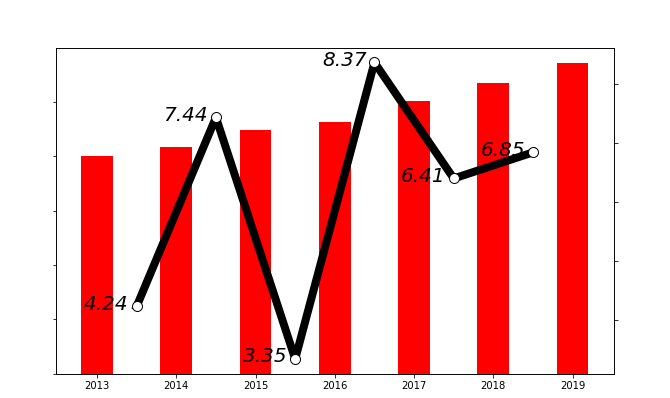

In [ ]:
# Grafico
fig, ax = plt.subplots()

# Creamos un grafico de barras de las Ventas anuales
ax.bar(dataset['Anio'],dataset['Ventas'],color = 'Red',width=0.4)
# Customizaciones
ax.set_title('Crecimiento anual de CocaCola-Company\n2014 - 2019'
             ,color = 'White',fontsize = 18)
ax.set_yticklabels(['0','1M','2M','3M','4M','5M'],color = 'White', fontsize = 15)
ax.set_ylabel('Ventas totales',color = 'White',fontsize = 15)

# Creamos un gráfico para el crecimiento anual
ax2 = ax.twinx()
ax2.plot(dataset.iloc[1:7,0]-0.5,Crecimiento,color='Black',lw = "8"
         ,marker = "o",markerfacecolor = "White",markersize  = "10")

# Customizaciones 
ax2.set_yticklabels(['3%','4%','5%','6%','7%','8%'],color = 'White',fontsize = 15)
ax2.set_ylabel('Crecimiento anual',color = 'White',fontsize = 15)

# Valores
anios = dataset.iloc[1:7,0]
labels = Crecimiento.round(2)

for anio, label in zip(anios,labels):
  ax2.text(anio-0.6,label+0.2,label,ha='right', va='top',fontsize = 20,fontstyle = 'italic')

# Tamaño de la figura
fig.set_size_inches(10,6)

plt.show()


### KPI 3 - RETURN ON EQUITY(ROE)
---
#### OBJETIVO
*   Mantener el retorno de la inversión elevado (ROE)

#### META
*   ROE = 75% - 90%

#### KPI
$ROE = \frac{Utilidad\ Neta}{Patrimonio}* 100$

In [10]:
# Calculo del ROE
dataset['ROE'] = dataset['Utilidad_neta']*100/dataset['Patrimonio_neto']
# Mostramos el endeudamiento
display(dataset.iloc[:,[0,-1]].round(2))

,Anio,ROE
0,2013,51.77
1,2014,50.80
2,2015,61.69
3,2016,42.06
4,2017,70.82
5,2018,81.84
6,2019,94.39


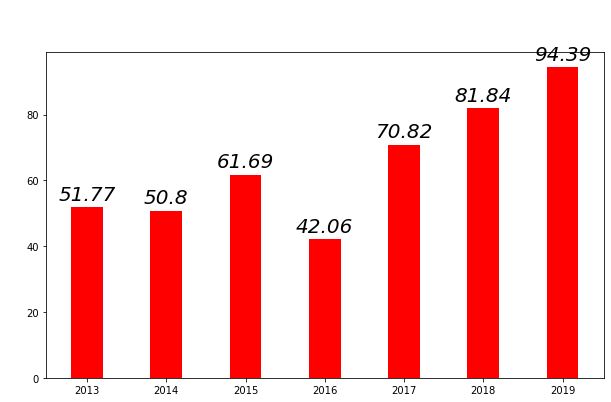

In [ ]:
# Gráfico
fig, ax = plt.subplots()

# Gráfico de líneas para el ROE
ax.bar(dataset['Anio'],dataset['ROE'],color='Red',width= 0.4)

# ,lw = "5" ,marker = "o",markerfacecolor = "White",markersize  = "12"

#Customizaciones
ax.set_title('ROE de CocaCola-Company\n2013 - 2019'
             ,color = 'White',fontsize = 22)
ax.set_ylabel('ROE %',color = 'White',fontsize = 15)

# Valores
anios = dataset['Anio']
labels = dataset['ROE'].round(2)

for anio, label in zip(anios,labels):
  ax.text(anio,label+1,label,ha='center', va='bottom'
          ,fontsize = 20,fontstyle = 'italic')

# Tamaño de la figura
fig.set_size_inches(10,6)

plt.show()


### KPI 4 - CUENTAS POR COBRAR
---
#### OBJETIVO
*   Disminuir el tiempo en que las cuentas por cobrar se convierten en efectivo

#### META
*   Disminuir el periodo medio de cobranza en 5 días

#### KPI
$Periodo\ medio\ de\ cobranza = \frac{Cuentas\ por\ cobrar}{Ventas}*365$

In [11]:
# Calculo de cuentas por cobrar
dataset['Cobranza'] = dataset['Cuentas_por_cobrar']*365/dataset['Ventas']
# Mostramos
display(dataset.iloc[:,[0,3,5,-1]].round(2))


,Anio,Ventas,Cuentas_por_cobrar,Cobranza
0,2013,4003734,387731,35.35
1,2014,4173505,336574,29.44
2,2015,4483993,379189,30.87
3,2016,4634129,301287,23.73
4,2017,5022009,876936,63.74
5,2018,5343674,1516207,103.56
6,2019,5709588,2086652,133.39


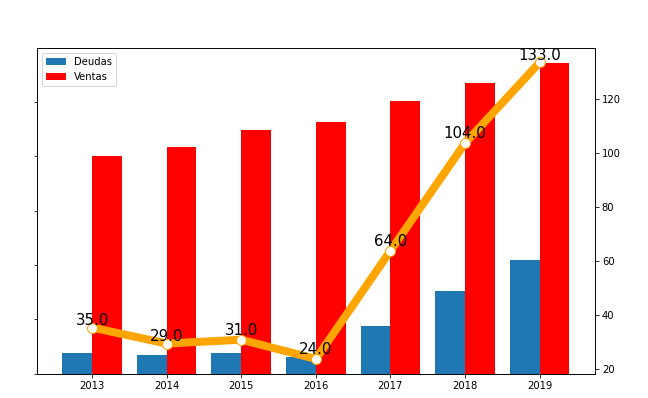

In [12]:
# Grafico
fig, ax = plt.subplots()

# Creamos un grafico de barras del Cuentas por cobrar
ax.bar(dataset['Anio']-0.2,dataset['Cuentas_por_cobrar'],width=0.4)
# Creamos un gráfico de barras del Ventas
ax.bar(dataset['Anio']+0.2,dataset['Ventas'],color = 'Red',width=0.4)
# Customizaciones
ax.legend(labels=['Deudas', 'Ventas'])
ax.set_title('Periodo promedio de cobro CocaCola-Company\n2013-2019'
             ,color = 'White',fontsize = 18)
ax.set_yticklabels(['0','1M','2M','3M','4M','5M','6M'],color = 'White', fontsize = 15)

# Creamos un gráfico para el Periodo promedio de cobro
ax2 = ax.twinx()
ax2.plot(dataset['Anio'],dataset['Cobranza'],color='Orange',lw = "8"
         ,marker = "o",markerfacecolor = 'White',markersize  = "10")
ax2.set_ylabel('Días promedio de cobro', color = 'White', fontsize = 15)

# Tamaño de la figura
fig.set_size_inches(10,6)

# Valores
anios = [2013,2014,2015,2016,2017,2018,2019]
labels = dataset['Cobranza'].round()

for anio, label in zip(anios,labels):
  ax2.text(anio,label+0.5,label,ha='center', va='bottom',fontsize = 15)

plt.show()

Interpretación: En términos generales y en el periodo que se está evaluando, las cuentas por cobrar han aumentado considerablemente, lo cual indica que pronto se contará con más efectivo para la compañía.


### KPI 5 - PRUEBA ÁCIDA
---
#### OBJETIVO
*   Mejorar la capacidad de pago a corto plazo

#### META
*   Prueba ácida mayor que 1

#### KPI
$Prueba\ ácida= \frac{Activo\ corriente\ - \ Inventarios}{Pasivo\ correinte}$

In [13]:
# Calculo de cuentas por cobrar
dataset['Prueba_ácida'] = (dataset['Activo_corriente']-dataset['Inventarios'])/dataset['Pasivo_corriente']
# Mostramos el endeudamiento
display(dataset.iloc[:,[0,6,7,8,-1]].round(3))

,Anio,Activo_corriente,Pasivo_corriente,Inventarios,Prueba_ácida
0,2013,782378,1152365,223260,0.485
1,2014,709413,1180020,197235,0.434
2,2015,926893,1382907,189972,0.533
3,2016,952440,1592220,154201,0.501
4,2017,2197450,3144813,183577,0.640
5,2018,2132139,3611216,198098,0.536
6,2019,2673838,3982487,223119,0.615


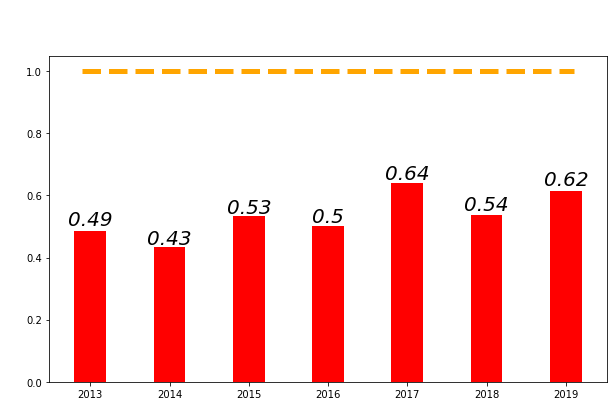

In [ ]:
# Gráfico
fig, ax = plt.subplots()

# Gráfico de líneas para la Prueba ácida
ax.bar(dataset['Anio'],dataset['Prueba_ácida'],color='Red',width= 0.4)

#Customizaciones
ax.set_title('Prueba Ácida de CocaCola-Company\n2013 - 2019'
             ,color = 'White',fontsize = 22)
ax.set_ylabel('Valor Prueba Ácida',color = 'White',fontsize = 15)
###########
ax.hlines(1,2012.9,2019.1,color = 'Orange',lw = 5,ls ='dashed')

# Valores
anios = dataset['Anio']
labels = dataset['Prueba_ácida'].round(2)

for anio, label in zip(anios,labels):
  ax.text(anio,label,label,ha='center', va='bottom'
          ,fontsize = 20,fontstyle = 'italic')

# Tamaño de la figura
fig.set_size_inches(10,6)

plt.show()

Interpretación: En el periodo evaluuado, el valor de prueba ácida es de 0.54 en promedio.
